In [1]:
import scipy.stats as sp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
sns.set_style('white')
#sns.set_context("notebook")

### single coin example

#### unknown population distribution

In [3]:
sample_size = 30
null_single = sp.bernoulli(.5)

In [4]:
sample = null_single.rvs(size=sample_size)

In [5]:
sample_stat = np.mean(sample)


#### calculate sampling distribution of mean

###### by Resampling

In [6]:
num_simulations = 10000

In [7]:
resample_dist = []
for _ in range(num_simulations):
    resample = np.random.choice(sample, size=len(sample), replace=True)
    resample_mean = np.mean(resample)
    resample_dist.append(resample_mean)

##### by Central Limit Theorem

In [8]:
clt_mean = np.mean(sample)
clt_var = np.var(sample)/sample_size

In [9]:
clt_dist = sp.norm(loc=clt_mean, scale=np.sqrt(clt_var))

##### Plot of Both Sampling Distributions

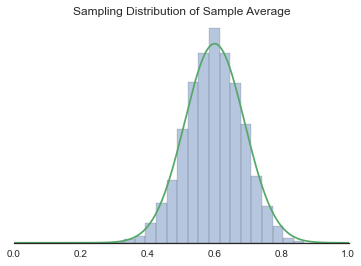

In [10]:
x = np.linspace(0,1,1000)

ax = sns.distplot(resample_dist, bins=20, kde=False, norm_hist=True)
ax.plot(x, clt_dist.pdf(x))
#sax.axvline(sample_stat, color='red')

sns.despine(top=True, left=True, right=True)
ax.set(yticklabels=[], title='Sampling Distribution of Sample Average')
sns.despine(top=True, left=True, right=True)

### two coin example

#### unknown population distribution

In [11]:
sample_size_one = 30
sample_size_two = 40
coin_one = sp.bernoulli(.5)
coin_two = sp.bernoulli(.7)

In [15]:
sample_one = coin_one.rvs(size=sample_size_one)
sample_two = coin_two.rvs(size=sample_size_two)
all_data = np.concatenate([sample_one, sample_two])

#### sampling distro and t test

In [18]:
two_coin_num_simulations = 10000

In [ ]:
two_coin_resample_dist = []
for _ in range(two_coin_num_simulations):
    resample_one

In [19]:
resample = np.random.choice(all_data, size=len(all_data), replace=False) 
resample_one = resample[:len(sample_one)]

array([[1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 1, 0]])

In [ ]:
resample_placebo, resample_drug = np.split(resample, [no_placebo])
    means_resample.append(np.mean(resample_drug) - np.mean(resample_placebo))